# Data Presentation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load cleaned non-standardized data
df = pd.read_csv('https://raw.githubusercontent.com/songzimen/London_subjective-well-being_model/main/data/data_clean.csv')

# select variables that p-value less than 0.05 in linear regreesion model
var_columns = ["Life Expectancy 2009-13", "Unemployment rate Average", 
                    "population_per_hectare", "travel_work_bicycle", 
                    "Subjective well-being average score Average"]
var_selected = df[var_columns]

## Descriptive summary

In [4]:
selected_descriptive_stats = var_selected.describe()
selected_descriptive_stats

,Life Expectancy 2009-13,Unemployment rate Average,population_per_hectare,travel_work_bicycle,Subjective well-being average score Average
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,82.005600,5.982528,80.347469,3.910400,7.641664
std,2.263928,3.154023,47.274419,3.377599,0.277357
min,76.000000,0.460000,1.769933,0.200000,6.880000
25%,80.400000,3.360000,45.442021,1.300000,7.440000
50%,81.900000,5.480000,68.584299,2.800000,7.640000
75%,83.400000,8.060000,108.045662,5.800000,7.860000
max,90.300000,19.660000,264.977478,19.100000,8.460000


## Correlation matrix

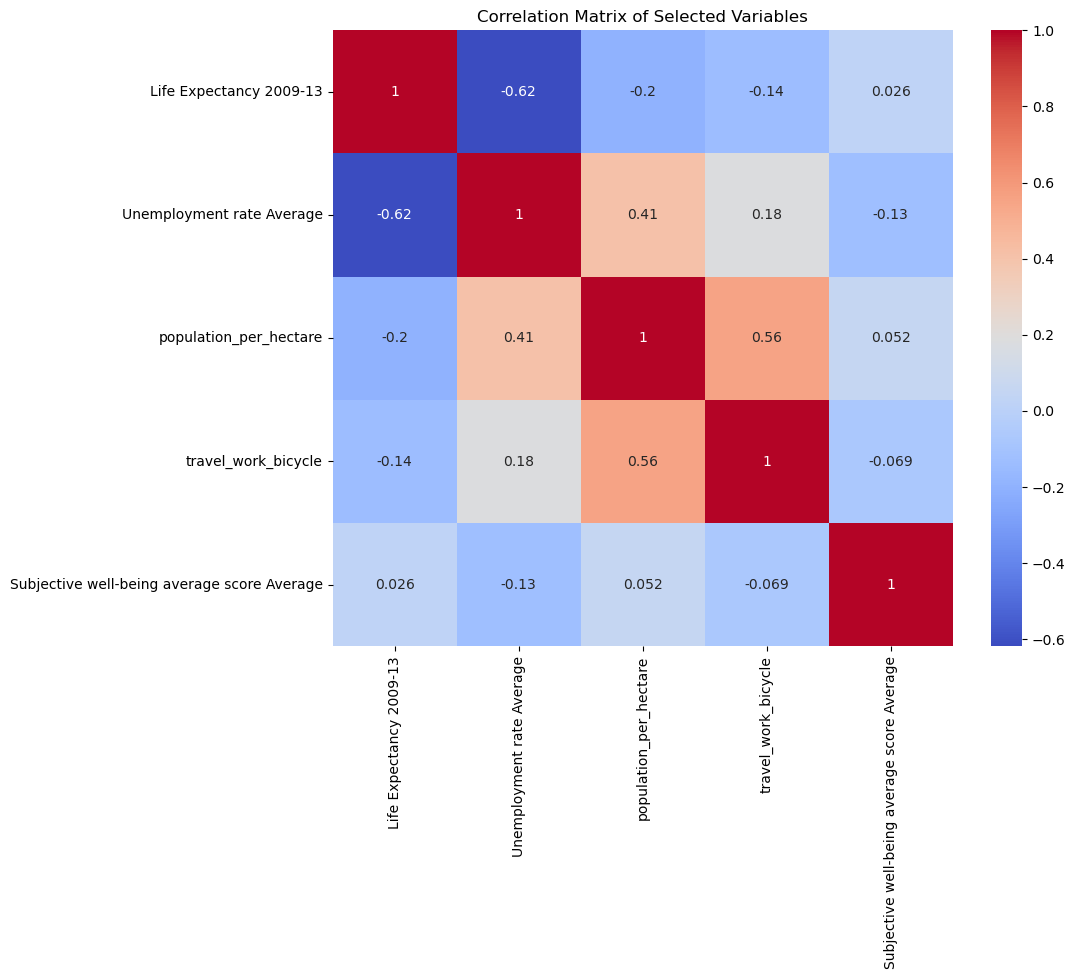

In [18]:
selected_correlation_matrix = var_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Variables')

plt.savefig("images/correlation matrix.png", dpi=300) 

## Histogram

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

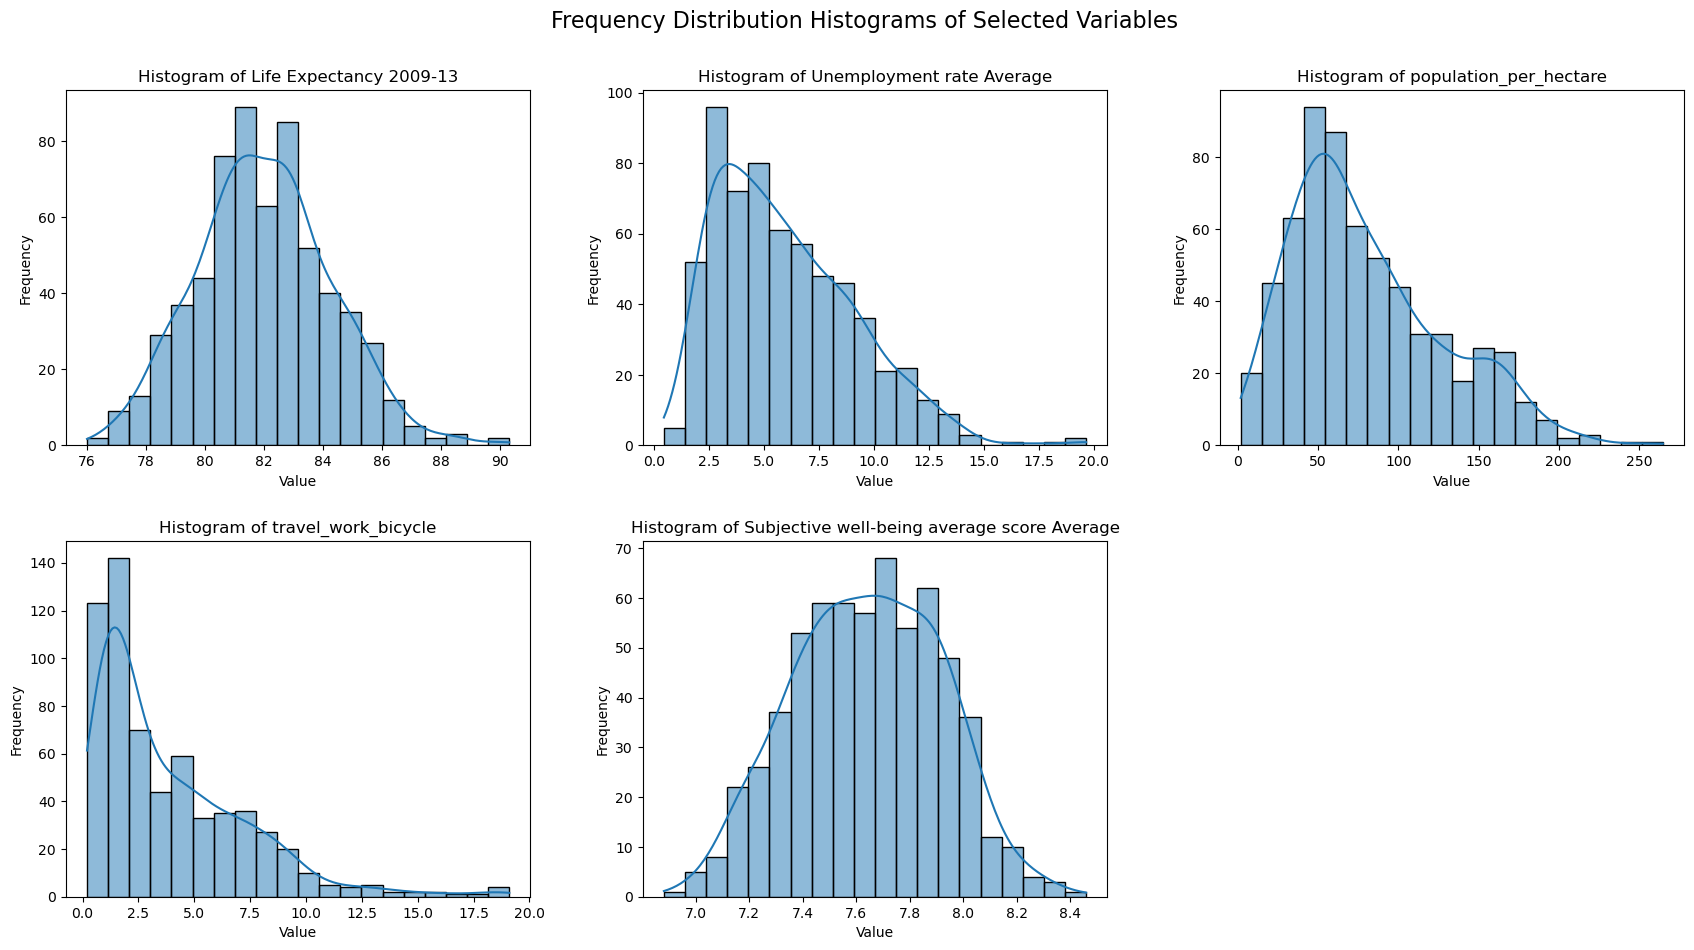

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.tight_layout(pad=5.0)

for i, column in enumerate(var_columns):
    ax = axes[i//3, i%3]
    sns.histplot(var_selected[column], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

fig.delaxes(axes[1][2])  # delete unnecessary sub-figures
plt.subplots_adjust(top=0.9)
fig.suptitle('Frequency Distribution Histograms of Selected Variables', fontsize=16)

plt.savefig("images/histogram.png", dpi=300) 

## Scatter plot

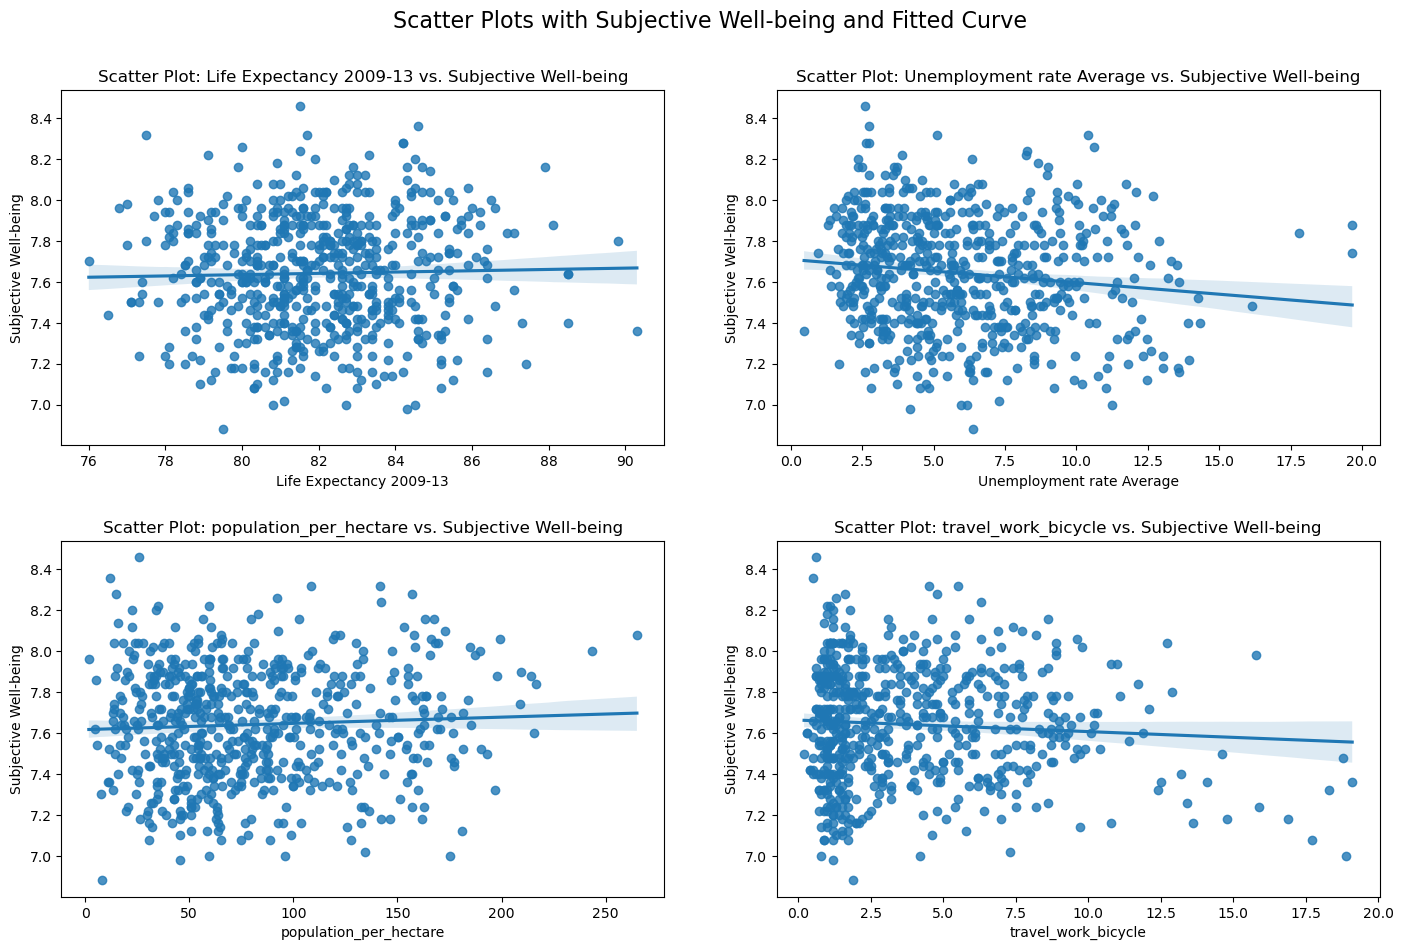

In [20]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

for i, column in enumerate(var_columns[:-1]):
    ax = axes[i//2, i%2]
    sns.regplot(x=var_selected[column], y=var_selected["Subjective well-being average score Average"], ax=ax)
    ax.set_title(f'Scatter Plot: {column} vs. Subjective Well-being')
    ax.set_xlabel(column)
    ax.set_ylabel("Subjective Well-being")

plt.subplots_adjust(top=0.9)
fig.suptitle('Scatter Plots with Subjective Well-being and Fitted Curve', fontsize=16)
plt.savefig("images/scatter plots.png", dpi=300) 
plt.show()


## Box-plot map

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

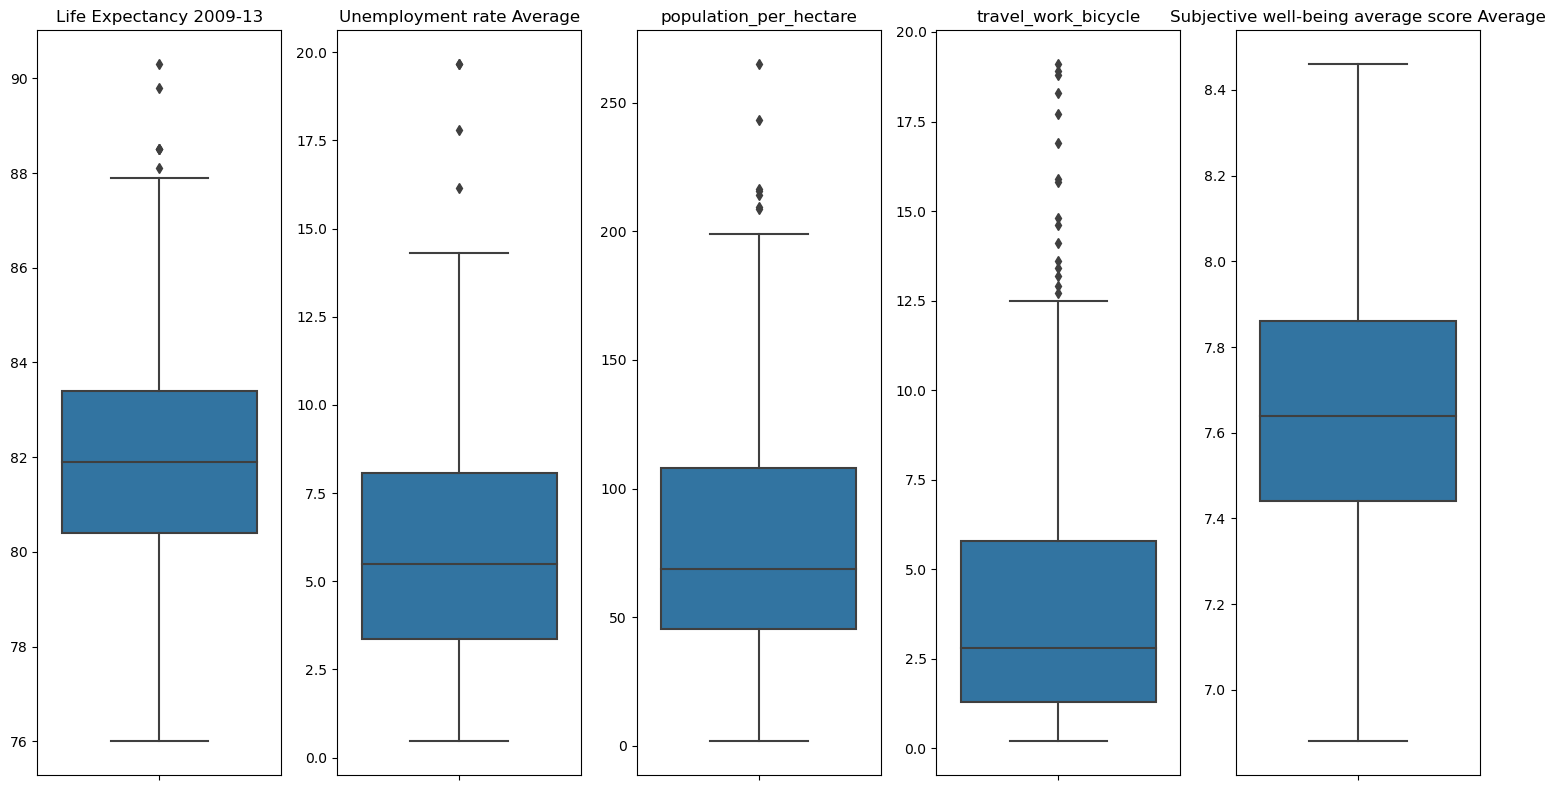

In [21]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(var_columns):
    plt.subplot(1, len(var_columns), i+1)
    sns.boxplot(y=var_selected[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.savefig("images/box-plot.png", dpi=300) 
plt.show()
